# <div align="right">Machine Learning
##### <div align="right"> *Followblindly*

# 5 - Principal Component Analysis

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

The goal is to preserve as much of the variance in the original data as possible in the new coordinate systems.
Give data on $d$ variables, the hope is that the data points will lie mainly in a linear subspace of dimension lower than $d$. In practice, the data will usually not lie precisely in some lower dimensional subspace. The new variables that form a new coordinate system are called **principal components** (PCs).

* PCs are denoted by $u_{1},u_{2},...,u_{d}.$
* The principal components form a basis for the data.
* Since PCs are orthogonal linear transformations of the original variables there is at most $d$ PCs.
* Normally, not all of the $d$ PCs are used but rather a subset of $p$ PCs, $u_{1},u_{2},...,u_{p}.$
* In order to approximate the space spanned by the original data points 
$x = \begin{bmatrix}
x_{1}    \\
...   \\
x_{d}   \\
\end{bmatrix}_{\ dx1}$
We can choose $p$ based on what percentage of the variance of the original data we would like to maintain.

The first PC, $u_{1}$ is called **first principal component** and has the maximum variance, thus it accounts for the most
significant variance in the data.

The second PC, $u_{2}$ is called **second principal component** and has the second highest variance and so on until PC ud which has the minimum variance.

> The most common definition of PCA, due to Hotelling is that, for a given set of data vectors $x_{i}, i \in 1...n$, the $p$ principal axes are those orthonormal axes onto which the variance retained under projection is maximal.

<img src="5_images/5_PC12.PNG" width=400px/>

In order to capture as much of the variability as possible, let us choose the first principal component, denoted by
$u_{1}$, to capture the maximum variance. Suppose that all centred observations are stacked into the columns of a $d$ × $n$ matrix 
$X = \begin{bmatrix}
x_{1} ... x_{n}  \\
\end{bmatrix}_{dxn}$, 
where each column corresponds to a $d$-dimensional observation and there are $n$ observations. The projection of $n$, $d$-dimensional observations on the first principal component $u_{1}$ is $u_{1}^{T}X$. We want projection on this first dimension to have maximum variance.

$$ \frac{1}{2N}\sum_{n=1}^{N}(u_{1}^{T}x_{n}-u_{1}^{T}\bar{x_{n}})^{2} = Var(u_{1}^{T}X)= u_{1}^{T}Su_{1} $$

Where $S$ is the $d$x$d$ sample covariance matrix of $X$.


Clearly $Var(u_{1}^{T}X)$ can be made arbitrarily large by increasing the magnitude of $u_{1}$. This means that the variance stated above has no upper limit and so we can not find the maximum. To solve this problem, we choose $u_{1}$ to maximize $u_{1}^{T}Su_{1}$ while constraining $u_{1}$ to have unit length. Therefore, we can rewrite the above optimization problem as:

$$
max \ \ u_{1}^{T}Su_{1} \\
Subject \ \ to \ \ u_{1}^{T}u_{1} = 1
$$

To solve this optimization problem a Lagrange multiplier λ is introduced:

$$
L(u_{1}, \lambda) = u_{1}^{T}Su_{1}-\lambda(u_{1}^{T}u_{1}-1)
$$

### Lagrange Multiplier for PCA
Lagrange multipliers are used to find the maximum or minimum of a function $f (x, y)$ subject to constraint
$g(x, y) = c$. we define a new constant $\lambda$ called a **Lagrange Multiplier** and we form the Lagrangian,

$$
L(x,y,\lambda) = f(x,y)-\lambda g(x,y)
$$

If $f(x^{*},y^{*})$ is the max of $f(x, y)$ , there exists $\lambda^{*}$ such that $(x^{*},y^{*},\lambda^{*})$ is a stationary point of $L$ (partial derivatives are 0). In addition $(x^{*},y^{*})$ is a point in which functions $f$ and $g$ touch but do not cross. At this point, the tangents of $f$ and $g$ are parallel or gradients of $f$ and $g$ are parallel, such that:

$$
\nabla_{x,y}f = \lambda\nabla_{x,y}g \\
$$

$$
\begin{align*}
Where, \ \nabla_{x,y}f &= (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}) \to the \ gradient \ of \ f \\ 
\nabla_{x,y}g &= (\frac{\partial g}{\partial x}, \frac{\partial g}{\partial y}) \to the \ gradient \ of \ g
\end{align*}
$$

Differentiating with respect to $u_{1}$ gives $d$ equations,

$$
\frac{\partial L(u_{1}, \lambda)}{\partial u_{1}} = 2S u_{1} - 2\lambda u_{1} = 0 \\
S u_{1} = \lambda u_{1}
$$

Premultiplying both sides by $u_{1}^{T}$ we have:

$$ u_{1}^{T}S u_{1} = \lambda u_{1}^{T} u_{1} = \lambda$$

$ u_{1}^{T}S u_{1}$ is maximized if $\lambda$ is the largest eigenvalue of $S$. Clearly $\lambda$ and $u_{1}$ are an eigenvalue and an eigenvector of $S$. Differentiating $L(u_{1}, \lambda)$ with respect to the Lagrange multiplier $\lambda$ gives us back the constraint:

$$u_{1}^{T}u_{1} = 1$$

This shows that the first principal component is given by the eigenvector with the largest associated eigenvalue of the sample covariance matrix $S$. A similar argument can show that the $p$ dominant eigenvectors of covariance matrix $S$ determine the first $p$ principal components.

Note that the PCs decompose the total variance in the data in the following way :

$$
\sum_{i=1}^{d}Var(u_{i}^{T}X) = \sum_{i=1}^{d}u_{1}^{T}Su_{1} = \sum_{i=1}^{d}(\lambda_{i}) = Tr(S) = Var(X)
$$

$Var(u_{1}^{T}X)$ is maximized if $u_{1}$ is the eigenvector of $S$ with the corresponding maximum eigenvalue. Each successive PC can be generated in the above manner by taking the eigenvectors of $S$ that correspond to the eigenvalues:

$$
\lambda_{1} \geq ... \geq \lambda_{d}
$$

Such that

$$
Var(u_{1}^{T}X) \geq ... \geq Var(u_{d}^{T}X)
$$

### Direct PCA Algorithm 
* **Normalize the data:** Set $X = X - \bar{X}$
* **Recover basis (PCs):** Calculate $XX^{T}=\sum_{i=1}^{n}x_{i}x_{i}^{T}$ and let $U=$ eigenvectors of $XX^{T}$ corresponding to the top $p$ eigenvalues.
* **Encode training data:** $Y=U^{T}X$ Where $Y$ is a $p$x$n$ matrix of encodings of the original data. 
* **Reconstruct training data:** $\hat{X} = UY=UU^{T}X$.
* **Encode test example:** $y=U^{T}x$ where $y$ is a $p$-dimensional encoding of x. 
* **Reconstruct test example:** $\hat{x} = Uy = UU^{T}x$.

$$
U^{T}_{pxd} \cdot 
(X=\begin{bmatrix}
x_{1}    \\
x_{2}    \\
.        \\
.        \\
.        \\
x_{n}    \\
\end{bmatrix}_{\ dxn})\longrightarrow 
(Y=\begin{bmatrix}
y_{1}    \\
y_{2}    \\
...        \\
y_{p}    \\
\end{bmatrix}_{\ pxn})
$$

A unique solution can be obtained by finding the singular value decomposition of $X$. For each rank $p$, $U$ consists of the first $p$ columns of $U$.

$$X=U\Sigma V^{T}$$
The columns of $U$ in the SVD contain the eigenvectors of $XX^{T}$

## Implementing PCA from scratch

### 1. Generating some 3-dimensional sample data

In [2]:
import numpy as np

np.random.seed(0) # random seed for consistency

# A reader pointed out that Python 2.7 would raise a
# "ValueError: object of too small depth for desired array".
# This can be avoided by choosing a smaller random seed, e.g. 1
# or by completely omitting this line, since I just used the random seed for
# consistency.

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

Populating the interactive namespace from numpy and matplotlib


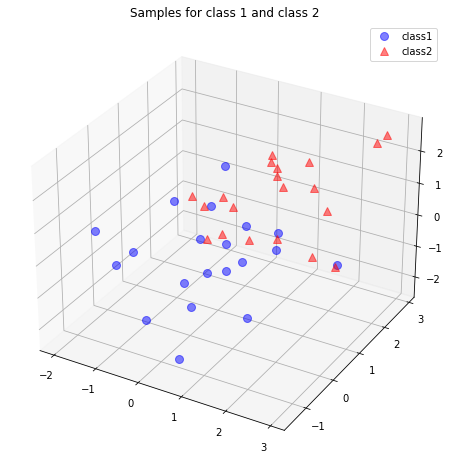

In [3]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

### 2. Taking the whole dataset ignoring the class labels

In [4]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

### 3. Computing the d-dimensional mean vector

In [5]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.69887368]
 [0.80019884]
 [0.39876272]]


### 4. Computing the Scatter Matrix

The scatter matrix is computed by the following equation:

$$
S = \sum_{k=1}^{n}(x_{k}-\bar{x})(x_{k}-\bar{x})^{T}
$$

where $\bar{x}$ is the mean vector

$$
\bar{x}=\frac{1}{n}\sum_{k=1}^{n}x_{k}
$$

In [6]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[54.75319714 12.1506419  20.98922466]
 [12.1506419  53.09745345 18.13107282]
 [20.98922466 18.13107282 56.45952312]]


### 5. Computing the Covariance Matrix (alternatively to the scatter matrix)

In [7]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[1.40392813 0.31155492 0.53818525]
 [0.31155492 1.36147317 0.4648993 ]
 [0.53818525 0.4648993  1.44768008]]


### 6. Computing eigenvectors and corresponding eigenvalues

In [8]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

In [9]:
# Checking the eigenvector-eigenvalue calculation
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

Populating the interactive namespace from numpy and matplotlib


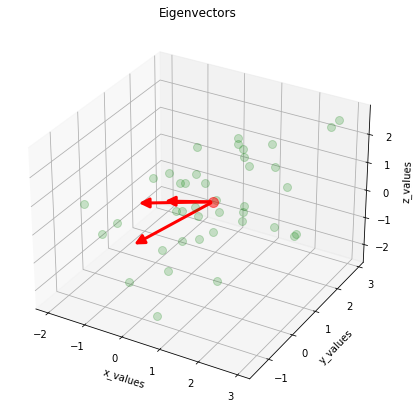

In [18]:
# Visualizing the eigenvectors
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

### 7. Sorting the eigenvectors by decreasing eigenvalues

In [11]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

89.42331351750258
41.81509448386742
33.07176570647168


### 8. Choosing k eigenvectors with the largest eigenvalues

In [14]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.5690384  -0.62675178]
 [-0.51164745  0.77664688]
 [-0.64374854 -0.06326004]]


### 9. Transforming the samples onto the new subspace

In [15]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

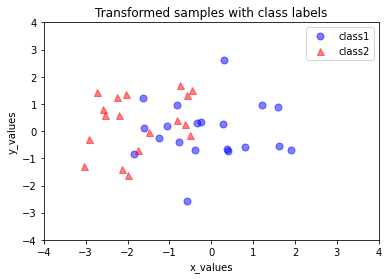

In [16]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

## Implementing PCA from sklearn

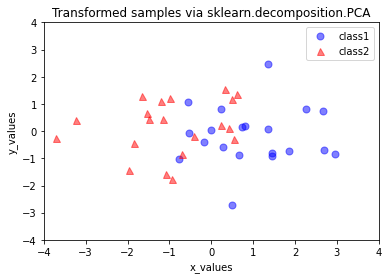

In [21]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)
sklearn_transf = sklearn_transf * (-1)

# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

## Referencce

[1] Raschka, S. (2014, April 13). Implementing a Principal Component Analysis (PCA). Dr. Sebastian Raschka. https://sebastianraschka.com/Articles/2014_pca_step_by_step.htmlprincipal-component-analysis-pca-vs-multiple-discriminant-analysis-mda.